In [30]:
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt

In [4]:
subj01 = pd.read_csv("/home/jovyan/shared/NSD/nsddata/ppdata/subj01/behav/responses.tsv",sep="\t")
subj01.head()

,SUBJECT,SESSION,RUN,TRIAL,73KID,10KID,TIME,ISOLD,ISCORRECT,RT,CHANGEMIND,MEMORYRECENT,MEMORYFIRST,ISOLDCURRENT,ISCORRECTCURRENT,TOTAL1,TOTAL2,BUTTON,MISSINGDATA
0,1,1,1,1,46003,626,0.505082,0,1.0,803.529781,0.0,NaN,NaN,0,1.0,1,0,1.0,0
1,1,1,1,2,61883,5013,0.505128,0,1.0,972.261383,0.0,NaN,NaN,0,1.0,1,0,1.0,0
2,1,1,1,3,829,4850,0.505175,0,1.0,742.351236,0.0,NaN,NaN,0,1.0,1,0,1.0,0
3,1,1,1,4,67574,8823,0.505221,0,1.0,747.518479,0.0,NaN,NaN,0,1.0,1,0,1.0,0
4,1,1,1,5,16021,9538,0.505267,0,1.0,547.422774,0.0,NaN,NaN,0,1.0,1,0,1.0,0


In [ ]:
beta_ss1 = nib.load("/home/jovyan/shared/NSD/nsddata_betas/ppdata/subj01/MNI/betas_fithrf/betas_session01.nii.gz")

In [48]:
data = beta_ss1.slicer[:, :, :, 1].get_fdata()/300

anat_T1 = nib.load("./T1_to_MNI.nii.gz")
anat_data = anat_T1.get_fdata()
#data1 = data[..., :idx]
#data2 = data[..., idx:]
nib.save(nib.Nifti1Image(data, beta_ss1.affine), "subj01_temp.nii.gz")
#nib.save(nib.Nifti1Image(data2, img.affine), "fname2.nii.gz")

In [23]:
data.shape

(182, 218, 182, 10)

In [31]:
import matplotlib.pyplot as plt
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

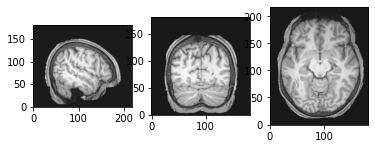

In [38]:
show_slices([anat_data[40, :, :],
             anat_data[:, 50, :],
             anat_data[:, :, 60]])

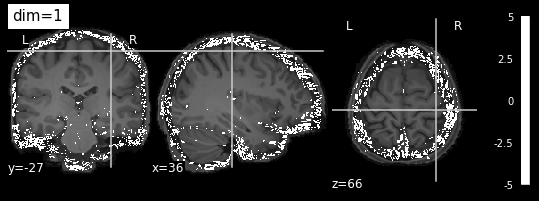

In [57]:
from nilearn import plotting
plotting.plot_stat_map("./subj01_temp.nii.gz",
                       bg_img="/home/jovyan/T1_to_MNI.nii.gz",
                       cut_coords=(36, -27, 66),
                       threshold=5, title="dim=1",
                       dim=1,vmax=5)